Метод максимального правдоподобия

In [8]:
#here please
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Задача 1. Свойства ММП оценок для модели нормального распределения

Рассмотрим следующую модель из независимых векторных наблюдений $X_1,..,X_n$:

$$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \Sigma).$$

Построим и исследуем оценку для вектора матожиданий $\mu$ и ковариационной матрицы $\Sigma$ методом максимального правдоподобия.

### Правдоподобие

Assuming $X_i \in \mathbb{R}^d$
$$
L(\mu, \Sigma) = \prod_{i=1}^n\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp\{-\frac{1}{2}(X_i-\mu)^T\Sigma^{-1}(X_i-\mu)\} 
= \frac{1}{(2\pi)^{nd/2}|\Sigma|^{n/2}} \exp\{-\frac{1}{2} \sum_{i=1}^n (X_i-\mu)^T \Sigma^{-1} (X_i-\mu)\} 
$$

$$
\ell(\mu, \Sigma) = -\frac{nd}{2}\ln2\pi -\frac{n}{2}\ln|\Sigma| - \frac{1}{2} \sum_{i=1}^n (X_i-\mu)^T \Sigma^{-1} (X_i-\mu)\
$$

### ММП-оценка

We compute the derivative of the log-likelihood function
$$
\frac{\partial}{\partial \mu} \ell(\mu, \Sigma) =
- \frac{1}{2} \sum_{i=1}^n \frac{\partial}{\partial \mu} (X_i - \mu)^\top \Sigma^{-1} (X_i - \mu)
$$
Computing derivative of each term
$$
\frac{\partial}{\partial \mu} (X_i - \mu)^\top \Sigma^{-1} (X_i - \mu) =
\frac{\partial}{\partial \mu}(X_i^\top \Sigma^{-1} X_i) - \frac{\partial}{\partial \mu}2 X_i^\top \Sigma^{-1} \mu + \frac{\partial}{\partial \mu}\mu^\top \Sigma^{-1} \mu =
$$$$
= 0 + 2 \Sigma^{-1} X_i + 2 \Sigma^{-1} \mu = 2\Sigma^{-1} (X_i - \mu)
$$
\
$$
\Rightarrow \frac{\partial}{\partial \mu} \ln L(\mu, \Sigma) = \sum_{i=1}^n \Sigma^{-1} (X_i - \mu).
$$

Setting the derivative equal to zero
$$
\sum_{i=1}^n \Sigma^{-1} (X_i - \mu) = 0 \quad \Rightarrow \quad \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n X_i = \bar{X}.
$$

Now we compute the derivative with respect to $\Sigma$, using known results for the derivatives of trace and determinant:
$
\frac{\partial}{\partial \Sigma} \ln |\Sigma| = \Sigma^{-1},\quad\frac{\partial}{\partial \Sigma} \operatorname{tr}(A \Sigma^{-1}) = -\Sigma^{-1} A \Sigma^{-1}.
$

$$
\frac{\partial}{\partial \Sigma} \ell(\mu, \Sigma) =
\frac{\partial}{\partial \Sigma} \left(-\frac{nd}{2}\ln2\pi -\frac{n}{2}\ln|\Sigma| - \frac{1}{2} \sum_{i=1}^n (X_i-\mu)^T \Sigma^{-1} (X_i-\mu) \right)= 
-\frac{n}{2} \Sigma^{-1} + \frac{1}{2} \sum_{i=1}^n \Sigma^{-1} (X_i - \mu)(X_i - \mu)^\top \Sigma^{-1}.
$$


Setting the derivative equal to zero and expressing $\Sigma$

$$
-\frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top \Sigma^{-1} = 0
$$

$$
-n \Sigma^{-1} + \Sigma^{-1} \sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top \Sigma^{-1} = 0
$$

$$
\sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top \Sigma^{-1} = n
$$

$$
\sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top = n \Sigma.
$$

From this we obtain an estimate:

$$
\hat{\Sigma}_{MLE} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)(X_i - \mu)^\top.
$$

In the one-dimensional case we have $\hat{\mu}_{MLE} = \overline{X}$ and $\hat{\sigma}^2_{MLE} = \overline{(X-\mu)^2}$ since $(X_i-\mu)=(X_i-\mu)^T$

## Свойства ММП оценок для модели равномерного распределения

$X_i \overset{iid}{\sim} U[0,a]$

### Правдоподобие

Since $X_1, \dots, X_n$ are independent:

$$
L(a) = \prod_{i=1}^n f(X_i \mid a) = \prod_{i=1}^n \frac{1}{a} = \frac{1}{a^n}
$$
Assuming that $a \geq X_{(n)} = \max(X_1, \dots, X_n)$, $L(a)=0$ otherwise.

$$
\ell(a) = \ln \left( \frac{1}{a^n} \right) = -n \ln a
$$

### ММП-оценка параметра $a$


Since $\ell(a) = -n \ln a$ is a decreasing function of $a$, to maximize it, we should take the minimum possible value of $a$

Therefore, the estimate obtained by the maximum likelihood method is $\hat{a}_{MLE} = X_{(n)}$, because $a \geq X_{(n)}$

## Оцениваем модель охлаждения

[(Другой) закон Ньютона](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)  -- простая математическая модель охлаждения(или нагревания) тела

$$
\frac{dT}{dt} = r (T_{env} - T(t)),
$$

это дифференциальное уравнение первого порядка, которое в непрерывном (то есть, в любой момент $t$) показывает, какая должна быть температура у тела, если дана начальная температура $T(0)=T_0$. Температурные единицы измерения -- Кельвины, $r$ -- это некоторая константа, зависящая от самого тела, от состава среды и т.п. . Это приближённый закон.

Вообще константа $r$ неизвестна априори и если мы хотим делать какое-то устройство, которое использует такую модель, мы должны как-то оценить $r$. Один из вариантов -- померить температуру среды (полагаем её константной), нагреть тело до какой-то температуры $T_0$, а потом оставить остывать и замерять через разные промежутки времени его температуру. По итогам таких наблюдений получится датасет
$$
T_{t_0},T_{t_1},..,T_{t_n}, ~~ t_0=0.
$$

Осталось придумать вероятностную модель. Например, мы можем записать приближённое дискретизированное по времени уравнение, используя метод Эйлера:

$$
T_{t_{i+1}} = T_{t_{i}} + r (T_{env} - T_{t_{i}}) \Delta t_i, ~~  \Delta t_i = t_{i+1} - t_i,
$$

а дальше предлагать разные варианты оценивания.

### Правдоподобие

С учётом ошибок измерений и необъяснимых факторов среды, договорившись измерять температуру через равные промежутки времени $\Delta t_i= \Delta t$, можно предположить модель, очень похожую на модель авторегрессии $AR(1)$:

$$
T_{i+1} = (1 - r\Delta t)T_{i} + r T_{env} \Delta t + \varepsilon_{i+1}, ~~ \varepsilon_{i+1} \sim_{iid} N(0,\sigma^2).
$$

1. Предполагая $T_{env}$ и $\Delta t$ данными, определите параметры модели, которые нужно оценивать и выведите функцию лог-правдоподобия.

2. Выведите оценки ММП для данной модели.

Parameters that need to be estimated are obviously $r$ and $\sigma^2$. Since $\varepsilon\sim\mathcal{N}(0, \sigma^2)$, $~~T_{i+1}~|~T_i\sim\mathcal{N}((1 - r\Delta t)T_{i} + r T_{env} \Delta t, \sigma^2)$. Hence, $~~L(r, \sigma^2) = \prod_{i=0}^{n-1} f(T_{i+1} \mid T_i)$, where $~~f(T_{i+1} \mid T_i) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{ -\frac{1}{2\sigma^2} \left( T_{i+1} - (1 - r\Delta t)T_i - r T_{\text{env}} \Delta t \right)^2 \right\}$. 
$$
L(r, \sigma^2) = \prod_{i=0}^{n-1} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{ -\frac{1}{2\sigma^2} \left( T_{i+1} - (1 - r\Delta t)T_i - r T_{\text{env}} \Delta t \right)^2 \right\}
$$
$$
\ell(r, \sigma^2) = -\frac{n}{2} \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r\Delta t)T_i - r T_{\text{env}} \Delta t \right)^2.
$$

$$
\underset{r}{\text{argmax}}~\ell(r, \sigma^2) = \underset{r}{\text{argmax}}\sum^{n-1}_{i=0}\left(T_{i+1}-T_{i}+r\Delta tT_{i}-r\Delta tT_{env}\right)^2 =
\underset{r}{\text{argmax}} \left(     \sum_{i=0}^{n-1}(T_{i+1} - T_{i})^2   +   
                                        2r\Delta t\sum_{i=0}^{n-1}(T_{i+1} - T_{i})(T_{i} - T_{env}) +
                                        r^2\Delta t^2\sum_{i=0}^{n-1}(T_{i} - T_{env})^2         \right) = 
$$
$$
= \underset{r}{\text{argmax}} \left(    S_1 + 2rS_2 + r^2S_3     \right) = \underset{r}{\text{argmax}} ~S
$$
$$
\frac{\partial S}{\partial r} = 2S_2+2rS_3 \Longrightarrow \hat{r}_{MLE} = -\frac{S_2}{S_3} =
 -\frac{\sum_{i=0}^{n-1}(T_{i+1} - T_{i})(T_{i} - T_{env})}{\Delta t\sum_{i=0}^{n-1}(T_{i} - T_{env})^2}
$$


$$
\frac{\partial\ell(r, \sigma^2)}{\partial\sigma^2} = -\frac{n}{2\sigma^2}+ \frac{1}{2\sigma^4} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - r\Delta t)T_i - r T_{\text{env}} \Delta t \right)^2=0
$$
$$
\hat{\sigma^2}_{MLE} = \frac{1}{n} \sum_{i=0}^{n-1} \left( T_{i+1} - (1 - \hat{r}_{MLE}\Delta t)T_i - \hat{r}_{MLE} T_{\text{env}} \Delta t \right)^2
$$

### Пишем модель

Имплементируем класс модели, используя шаблон ниже и проведем некоторые тесты, чтобы убедиться, что он рабочий.

In [220]:
class CoolingModel:
    
    def __init__(self, r, delta, sigma2):
        self.r = r
        self.sigma2 = sigma2
        self.delta = delta
        
    def step(self,T0,Tenv):
        """Makes one step in time

        Args:
            T0 (float[]): current temperature (NTraj,)
            Tenv (float[]): current environment temperature (NTraj,)
        Returns:
            T (float[]): next temperature (NTraj,)
        """        
        noise = np.random.normal(0, np.sqrt(self.sigma2), size=T0.shape)
        T_next = (1 - self.r * self.delta) * T0 + self.r * self.delta * Tenv + noise
        return T_next
    
    def simulate(self, T0, NSteps, Tenv):
        """Simulates NTraj trajectories of cooling process

        Args:
            T0 (float[]): initial temperature (NTraj,)
            NSteps (int): number of time steps
            Tenv (float): environment temperature
        Returns:
            trajs (float[]): simulation result (NTraj,NSteps)
        """
        Tenv = np.ones_like(T0) * Tenv
        trajs = np.zeros([T0.shape[0], NSteps+1])
        trajs[:, 0] = T0
        for step in range(1, NSteps+1):
            trajs[:, step] = self.step(trajs[:, step-1], Tenv)
        return trajs

    def fit(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """
        deltas = np.diff(temps)
        centered = temps[:-1] - Tenv

        r_mle = -np.sum(deltas * centered) / (self.delta * np.sum(centered ** 2))

        sigma2_mle = np.sum((deltas + r_mle * self.delta * centered) ** 2) / len(temps)

        self.r = r_mle
        self.sigma2 = sigma2_mle

        return self.r, self.sigma2

In [221]:
#params
r = 0.2 #1/sec
sigma2=0.02

#time stuff
NSteps = 1000
finalTime = 100
delta=finalTime/NSteps #sec

#number of simulations
NTrajs = 5

#temperatures
T0 = np.ones([NTrajs])*280 #K
Tenv = 300 #K

procModel = CoolingModel(r,delta,sigma2)
trajs = procModel.simulate(T0,NSteps,Tenv)

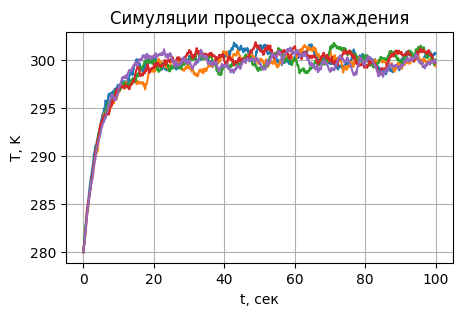

In [222]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T)
plt.show()

As we can see from the graph, with these parameters, the temperature reaches 300 degrees Kelvin in about twenty seconds and randomly fluctuates around this point for the remaining time

### Оценка модели по данным

Оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия. Данные в формате ``pkl``, загружаются как словарь.

In [223]:
with open("./coolingModel.pkl","rb") as f:
    dd = pkl.load(f)

temps = dd["temperature"]
Tenv = dd["Tenv"]
delta = dd["delta"]

In [224]:
#random init
procModel = CoolingModel(0.1,delta,0.1)
procModel.fit(temps, Tenv)

# Print the estimated parameters
print(f"Parameters:  r={procModel.r},sigma^2={procModel.sigma2}")

Parameters:  r=0.03608793300832803,sigma^2=0.015206095468088227


In [225]:
NTraj = 10
finalTime = dd['time'][-1]
T0 = np.ones(NTraj) * temps[0]
NSteps = len(dd['time']) - 1

trajs = procModel.simulate(T0, NSteps, Tenv)

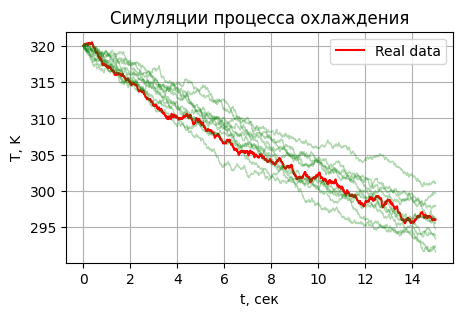

In [226]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")

ax.plot(dd['time'], temps, label="Real data", color='red')

for i in range(NTraj):
    ax.plot(ts, trajs[i, :], color='green', alpha=0.3, linewidth=1)
    
plt.legend()

plt.show()

As we can see, the trajectories that we simulated are, on average, quite similar to real data, from which we can conclude that our model works correctly

## Дискретная модель цен

### Броуновское движение

[Броуновское движение (или по-другому Винеровский процесс)](https://en.wikipedia.org/wiki/Wiener_process)  - это случайный процесс (набор случайных величин) $\{W_t\}_{t \geq 0}$ c непрерывным временем, который задётся так:

* $W_0 = 0$

* $W_t - W_s \sim \mathcal{N}(0, t-s)$, $0 \leq s \leq t$

* $W_{t_2} - W_{t_1}$ и $W_{t_4} - W_{t_3}$  независимы для $0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$

Мы можем попытаться нарисовать значения процесса в любом конечном наборе точек $(t_i)_{i=0}^{N_t}$, это будут зависимые случайные величины. Удобнее всего для симуляции пользоваться последним свойством: если обозначить $\Delta t_i = t_{i+1} - t_i$, то

$$
W_{t_{i+1}} = W_{t_i} + \varepsilon_{i+1},
$$

где $W_{t_0}$ задано, а шумы $\varepsilon_{i+1} \sim N(0, \Delta t_i)$ независимы.

### Симуляция

In [48]:
class BrownianMotion:

    def __init__(self):
        pass

    def sample(self, ts, Ntraj):
        """Returns a discrete set of observations

        Args:
            ts (float[]): time grid (T,)
            Ntraj (int): number of trajectories to sample
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        trajs = np.zeros([Ntraj,len(ts)])
        for traj in range(Ntraj):
            # Iterate over time steps to build the Brownian motion
            for i in range(1, len(ts)):
                delta_t = ts[i] - ts[i-1]
                # Increment using normal distribution N(0, delta_t)
                trajs[traj, i] = trajs[traj, i-1] + np.random.normal(0, np.sqrt(delta_t))
        
        return trajs

Нарисуем набор семплов наблюдений $W_{t_0},..,W_{t_{N_{t}}}$ из модели Броуновского движения при $t_0=0$ и $W_{t_0} = 0$.

In [49]:
Ntraj = 50
T=3
Nt = 100#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T] 

bmProc = BrownianMotion()
trajs = bmProc.sample(ts,Ntraj)

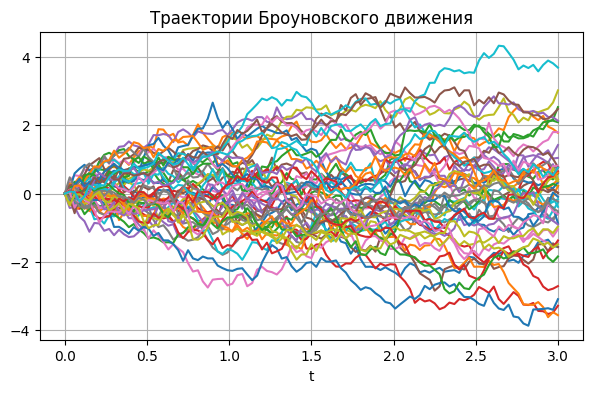

In [50]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории Броуновского движения")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

## Геометрическое Броуновское движение

Геометрическое Броуновское движение (GBM) -- это модель

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t],
$$

где параметр $\mu$ называется сносом (он связан с безрисковой процентной ставкой на рынке и выплатами по активу, например, дивидендами акции), а $\sigma$ -- волатильностью. Это один из базовых кирпичиков моделей финансовых рядов.

Пусть мы пронаблюдали набор значений $S_{t_1},..,S_{t_N}$, давайте получим оценки параметров и попробуем оценить их по данным.


### Параметры

The parameters we will estimate are $\mu$, $\sigma$

### Правдоподобие

We know $W_{t_{i+1}} - W_{t_{i}} \sim \mathcal{N}(0, t_{i+1} - t_{i})$, so let's try to get normal distribution from our formula:
$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t] \Longrightarrow 
\ln S_t = \ln S_0 + (\mu - \frac{\sigma^2}{2})t + \sigma W_t  \Longrightarrow 
\ln S_{t_{i+1}} - \ln S_{t_i} = (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_{i}) + \sigma( W_{t_{i+1}} - W_{t_{i}}) 
$$ 
$$
\ln S_{t_{i+1}} - \ln S_{t_i} \sim \mathcal{N}\left((\mu - \frac{\sigma^2}{2})(t_{i+1} - t_{i}, ~~\sigma^2(t_{i+1} - t_{i}) \right)
$$
$$
L(\mu, \sigma | S_{t_1}, \dots, S_{t_N}) =
\prod_{i=1}^{N-1} \frac{1}{\sqrt{2\pi \sigma^2 (t_{i+1} - t_i)}}
\exp\left(-\frac{\left(\ln \frac{S_{t_{i+1}}}{S_{t_i}} - \left(\mu - \frac{\sigma^2}{2}\right)(t_{i+1} - t_i)\right)^2}{2\sigma^2 (t_{i+1} - t_i)}\right)
$$
$$
\ell(\mu, \sigma | S_{t_1}, \dots, S_{t_N}) = 
-\frac{1}{2} \sum_{i=1}^{N-1} \left(\ln (2\pi \sigma^2 (t_{i+1} - t_i)) 
 + \frac{\left(\ln \frac{S_{t_{i+1}}}{S_{t_i}} - \left(\mu - \frac{\sigma^2}{2}\right)(t_{i+1} - t_i)\right)^2}{\sigma^2 (t_{i+1} - t_i)}\right)
$$

### ММП-оценки

Let's say $X_i = \ln\frac{S_{t_{i+1}}}{S_{t_{i}}}$, $\Delta t = t_{i+1} - t_i$ and $\theta=\mu-\frac{\sigma^2}{2}$, so
$$
\ell(\mu, \sigma | S_{t_1}, \dots, S_{t_N}) = 
-\frac{1}{2} \sum_{i=1}^{N-1} \left(\ln (2\pi \sigma^2 \Delta t) 
 + \frac{\left(X_i - \theta\Delta t\right)^2}{\sigma^2 \Delta t}\right)
$$
Let's start from finding an estimate for $\theta$:
$$
\frac{\partial \ell}{\partial \theta} = \sum_{i=1}^{N-1} \frac{X_i - \theta \Delta t_i}{\sigma^2}
$$
$$
\sum_{i=1}^{N-1} \left(X_i - \hat{\theta}_{MLE} \Delta t_i\right) = 0
$$
$$
\hat{\theta}_{MLE} = \frac{\sum_{i=1}^{N-1} X_i}{\sum_{i=1}^{N-1}\Delta t_i}
$$
Continue with $\sigma^2$:
$$
\frac{\partial \ell}{\partial \sigma^2} =
-\frac{1}{2} \sum_{i=1}^{N-1} \left( \frac{1}{\sigma^2} - \frac{\left( X_i - \theta \Delta t_i \right)^2}{\sigma^4 \Delta t_i} \right)  =
 \frac{N-1}{2\sigma^2} +\frac{1}{2} \sum_{i=1}^{N-1} \left(\frac{\left( X_i - \theta \Delta t_i \right)^2}{\sigma^4 \Delta t_i} \right) = 0
$$
$$
\hat{\sigma^2}_{MLE} = \frac{1}{N-1} \sum_{i=1}^{N-1} \left(\frac{\left( X_i - \hat{\theta}_{MLE} \Delta t_i \right)^2}{\Delta t_i} \right) =
\frac{1}{N-1} \sum_{i=1}^{N-1} \left(\frac{\left( X_i - \frac{\sum_{i=1}^{N-1} X_i}{\sum_{i=1}^{N-1}\Delta t_i} \Delta t_i \right)^2}{\Delta t_i} \right)
$$
Expressing $\hat{\mu}_{MLE}$:
$$
\hat{\mu}_{MLE} = \hat{\theta}_{MLE} + \frac{\hat{\sigma^2}_{MLE}}{2} = 
\frac{\sum_{i=1}^{N-1} X_i}{\sum_{i=1}^{N-1}\Delta t_i} + \frac{1}{2(N-1)} \sum_{i=1}^{N-1} \left(\frac{\left( X_i - \frac{\sum_{i=1}^{N-1} X_i}{\sum_{i=1}^{N-1}\Delta t_i} \Delta t_i \right)^2}{\Delta t_i} \right)
$$


### Пишем модель

In [110]:
class GBM:

    def __init__(self,mu,sigma):
        self.mu = mu 
        self.sigma = sigma
        self.brownMotion = BrownianMotion() 

    def sample(self, x0, ts):
        """Returns a discrete set of observations

        Args:
            x0 (float[]): set of initial conditions x_{ts[0]}  (Ntraj,)
            ts (float[]): time grid (T,)
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        Ntraj = x0.shape[0]
        W = self.brownMotion.sample(ts, Ntraj)
        trajs = np.zeros((Ntraj, len(ts)))
        for traj in range(Ntraj):
            for i in range(len(ts)):
                t = ts[i]
                trajs[traj, i] = x0[traj] * np.exp((self.mu - 0.5 * self.sigma ** 2) * t + self.sigma * W[traj, i])
        return trajs

    def fit(self, st, delta):
        """Fits the parameters given the data (assuming the step size is constant and equal delta)

        Args:
            st (float[]): observations (T,)
            delta (flaot): time step size
        """
        Xs = np.diff(np.log(st))

        theta_hat = np.sum(Xs) / (delta * len(Xs))

        sigma_hat_sq = np.mean((Xs - theta_hat*delta)**2 / delta)

        self.mu = theta_hat + sigma_hat_sq / 2

        self.sigma = np.sqrt(sigma_hat_sq)

Протестируем.

In [111]:
#example
Ntraj = 50
T=50
Nt = 5000#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T] 

mu=0.02
sigma=0.27
gbmProc = GBM(mu, sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

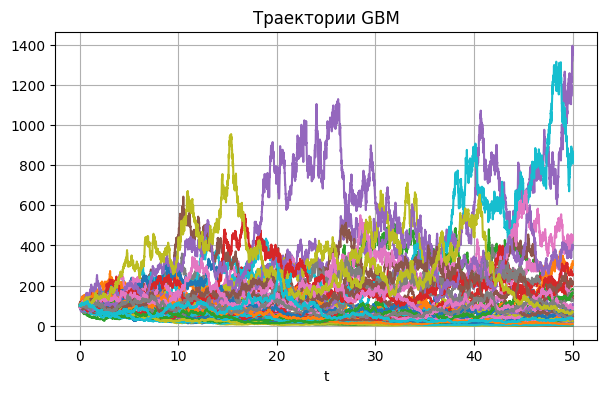

In [112]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

### Оценка модели по данным

Оценим параметры, используя данный датасет, с помощью метода максимального правдоподобия

In [113]:
# load data
with open("./gbmData.pkl", "rb") as f:
    dd=pkl.load(f)
    st = dd['value']
    time = dd['time']
    delta = np.diff(time)[0]

In [114]:
#random init
gbmProc = GBM(0.01, 0.01)
gbmProc.fit(st, delta)

print('mu_MLE', gbmProc.mu)
print('sigma_MLE', gbmProc.sigma) 

mu_MLE 0.08419912929329919
sigma_MLE 0.19546453929856075


In [119]:
#generating new trajectories
Ntraj = 10

ts = dd['time']
x0 = np.array([st[0]] * Ntraj)

trajs = gbmProc.sample(x0, ts)

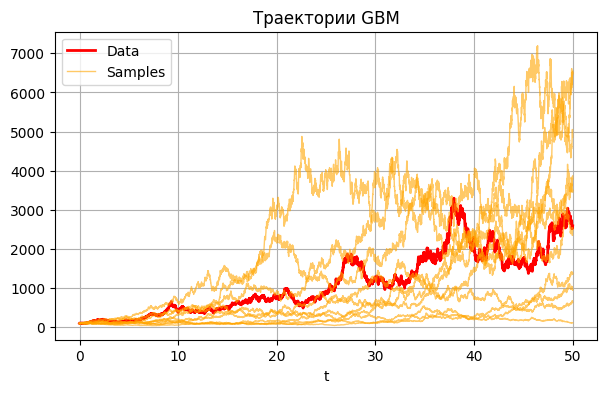

In [120]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")

ax.plot(ts, st, color='red', linewidth=2, label="Data")

for i in range(Ntraj):
    ax.plot(ts, trajs[i], color='orange', linewidth=1, alpha=0.6)

ax.legend(["Data","Samples"])
plt.show()

As we can see, the trajectories that we simulated are, on average, quite similar to real data, from which we can conclude that our model works correctly.
Although it looks not so effective as the previous one, so let us see if logarithmic scale makes the difference.

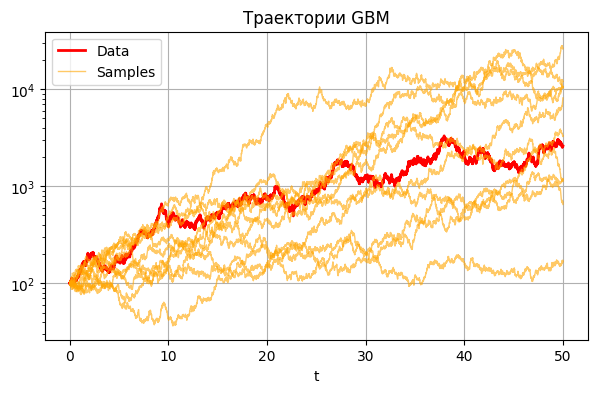

In [123]:
x0 = np.array([st[0]] * 10)
trajs = gbmProc.sample(x0, time)

f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")

ax.plot(ts, st, color='red', linewidth=2, label="Data")

for i in range(Ntraj):
    ax.plot(ts, trajs[i], color='orange', linewidth=1, alpha=0.6)

ax.legend(["Data","Samples"])
ax.set_yscale('log')
plt.show()

As we see logarithmic scale really looks much more plausible